In [2]:
# import labriares
import os 
import json 
import nltk
import random
import string
import pickle
import collections
import numpy as np
from random import seed
from random import randint
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
import matplotlib.pyplot as plt

In [4]:
file = open(os.path.join('../outputs','funcs_logs.txt'),'r')
lines = file.readlines()
valid_auc = list()
test_auc  = list()
for value in lines:
    if value.startswith('Validation') == True:
        ls = value.split(' ')
        valid_auc.append(float(ls[2]))
    if value.startswith('Testing') == True:
        ls = value.split(' ')
        test_auc.append(float(ls[2]))

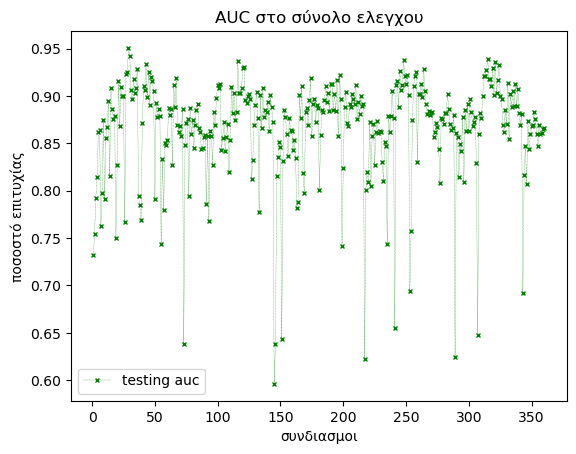

In [5]:
x_idx = [i for i in range(1,len(test_auc)+1)]
plt.plot(x_idx, test_auc, color='green', linestyle='dashed', linewidth = 0.2,
         marker='x', markerfacecolor='green', markersize=3,label = "testing auc")

plt.title('AUC στο σύνολο ελεγχου')
plt.xlabel('συνδιασμοι')
plt.ylabel('ποσοστό επιτυχίας')
plt.legend()
plt.savefig('test.png')
# function to show the plot
plt.show()

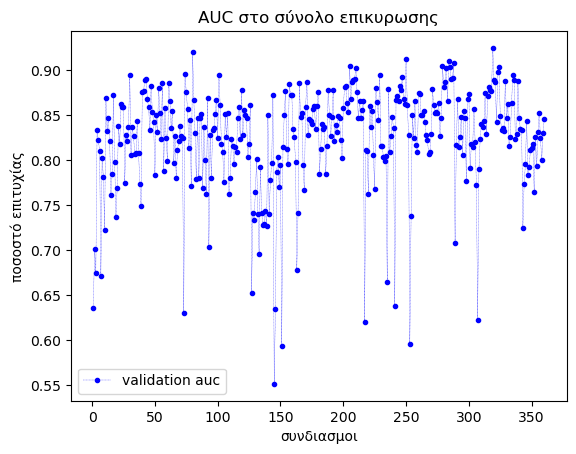

In [6]:
x_idx = [i for i in range(1,len(test_auc)+1)]
kappa=plt.plot(x_idx, valid_auc, color='blue', linestyle='dashed', linewidth = 0.2,
         marker='o', markerfacecolor='blue', markersize=3,label = "validation auc")

plt.title('AUC στο σύνολο επικυρωσης')
plt.xlabel('συνδιασμοι')
plt.ylabel('ποσοστό επιτυχίας')
plt.legend()
# function to show the plot
plt.savefig('valid.png')
plt.show()


In [75]:
def load_data(descriptions,dir_path):
    
    counter        = 0
    counter_issues = 0
    
    for fname in os.listdir(dir_path):
        with open(os.path.join(dir_path,fname)) as json_file:
            
            ##############################
            print(counter,") reading file",fname)
            counter += 1
            ##############################
            
            #load data in json format
            data = json.load(json_file)
            for p in data:
                
                ##############################
                issue_name     = p['name']
                counter_issues += 1
                #print("  ",counter_issues,")",issue_name)
                ##############################
                
                issue_desc     = p['description']
                
                # add all non empty issues and non dublicate.
                if issue_desc != [] and issue_desc not in descriptions:
                    descriptions.append(issue_desc)


In [3]:
def clean_data(clean_descriptions,raw_descriptions):
    
    # define stop words
    all_stopwords = set(stopwords.words('english'))
    
    # define translator to translate punctuation to white space
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    
    for desc in raw_descriptions:
        
        #join all lines into one sentence
        sentence = ' '.join(desc)
        
        #translate punctuation
        new_sentence = sentence.translate(translator)
        
        #split the sentense in words
        words = new_sentence.split()
        words_sw = [w.lower() for w in words if not w.lower() in all_stopwords and len(w)>1]
        
        clean_descriptions.append(words_sw)
        

In [4]:
def stemming_data(descriptions):
    
    stemmer = PorterStemmer()
    
    for desc in descriptions:
        for counter in range(len(desc)):
            if desc[counter].isalpha():
                desc[counter] = stemmer.stem(desc[counter])
   

In [5]:
#the first time the below command should run to download stopwords
#nltk.download('stopwords')

# define necessary parameters
dir_path         = '../data'
raw_descriptions = []
min_size         = 10

# load all issues descriptions
load_data(raw_descriptions,dir_path)

# split and clean descriptions
clean_descriptions = []
clean_data(clean_descriptions,raw_descriptions)

# list raw_descriptions now is useless
# del raw_descriptions

# stemming, it's not necessary step.
stemming_data(clean_descriptions)

0 ) reading file data_word_emb94.json
1 ) reading file data_word_emb26.json
2 ) reading file data_word_emb58.json
3 ) reading file data_word_emb130.json
4 ) reading file data_word_emb215.json
5 ) reading file data_word_emb156.json
6 ) reading file data_word_emb128.json
7 ) reading file data_word_emb157.json
8 ) reading file data_word_emb177.json
9 ) reading file data_word_emb22.json
10 ) reading file data_word_emb28.json
11 ) reading file data_word_emb79.json
12 ) reading file data_word_emb152.json
13 ) reading file data_word_emb126.json
14 ) reading file data_word_emb114.json
15 ) reading file data_word_emb70.json
16 ) reading file data_word_emb5.json
17 ) reading file data_word_emb93.json
18 ) reading file data_word_emb117.json
19 ) reading file data_word_emb135.json
20 ) reading file data_word_emb37.json
21 ) reading file data_word_emb96.json
22 ) reading file data_word_emb217.json
23 ) reading file data_word_emb243.json
24 ) reading file data_word_emb155.json
25 ) reading file data

243 ) reading file data_word_emb42.json
244 ) reading file data_word_emb9.json
245 ) reading file data_word_emb125.json
246 ) reading file data_word_emb181.json
247 ) reading file data_word_emb118.json
248 ) reading file data_word_emb162.json
249 ) reading file data_word_emb119.json
250 ) reading file data_word_emb167.json
251 ) reading file data_word_emb137.json
252 ) reading file data_word_emb56.json
253 ) reading file data_word_emb242.json


In [6]:
def find_str(clean_descriptions,search_string):
    for counter,desc in enumerate(clean_descriptions):
        if search_string in desc:
            print(counter)
            print(counter//25)
            print(counter%25)
            break
    print(raw_descriptions[counter])
    print("------------------------")
    print(clean_descriptions[counter])

In [7]:
find_str(clean_descriptions,"4ob3gfhlrr3cg77bjpyehlbbaxwdbiybmjf5wvl6cguaui5h6uk37qdg7cfss6vtta5q3np5tt7c4tvbb3hvm55oo3m25xjlbpge2myx3weualqsugsklarbf5zr4wr73bxpjenu25fq66xwvehqqummwzfcxngq5hpuypgw7iswwubly6vqsnrohafalqjmqczi6mhegt6imiji2xed7l4clttffkgs2e4mdyr3mawxhyflrxka")

4535
181
10
['As discussed recently on IRC.', ' At some points several load/save operations to/from the DB are performed in a row according to the log. It might be, that this can be optimized.', 'Example:', 'Refresh a stored cache', 'Log:', '  16:52:26.250 Debug cgeo 27215  GET http://www.geocaching.com/seek/cache_details.aspx?decrypt=y&amp;wp=GC38K48&amp;log=y&amp;numlogs=35 16:52:27.453 Debug cgeo 27215  200 (1210 ms) GET http://www.geocaching.com/seek/cache_details.aspx?decrypt=y&amp;wp=GC38K48&amp;log=y&amp;numlogs=35 16:52:28.000 Debug cgeo 27215  Loading GC38K48 Schnäppchenraub in Kupferdreh (1) from DB 16:52:28.000 Debug cgeo 27215  GET http://www.geocaching.com/seek/geocache.logbook?tkn=4OB3GFHLRR3CG77BJPYEHLBBAXWDBIYBMJF5WVL6CGUAUI5H6UK37QDG7CFSS6VTTA5Q3NP5TT7C4TVBB3HVM55OO3M25XJLBPGE2MYX3WEUALQSUGSKLARBF5ZR4WR73BXPJENU25FQ66XWVEHQQUMMWZFCXNGQ5HPUYPGW7ISWWUBLY6VQSNROHAFALQJMQCZI6MHEGT6IMIJI2XED7L4CLTTFFKGS2E4MDYR3MAWXHYFLRXKA&amp;idx=1&amp;num=35&amp;decrypt=true&amp;sf=true 1

In [31]:
print(raw_descriptions[6060])

['Hi,', 'Just for discussion topic ... I have one idea ... which can make our life easier. What about little redesign to CacheCache. Now when you modify anything in Geocache object, waypoint ... etc, you have to call cache.saveToDatabase(...), otherwise your changes will not persist. I have one idea ... to have CacheCache as singleton in our app and modifying models in that way, that it automatically track changes and set "commit interval" like it is being on filesystems.', 'For example:', "you query cache by GC code from database => it is not in cache, so it will be loaded from db and sets it's validity to current timestamp and modified flag to false", 'you modify it by calling some setter on it or on its childs (for example you add waypoint)', 'model itself sets modified flag to true', 'changes will be written back to db, by background thread, which will go through cache and write all changed objects and reset their modified/validity state', 'on destruction of CacheCache (or the whol

In [32]:
print(clean_descriptions[6060])

['hi', 'discussion', 'topic', 'one', 'idea', 'make', 'life', 'easier', 'little', 'redesign', 'cachecache', 'modify', 'anything', 'geocache', 'object', 'waypoint', 'etc', 'call', 'cache', 'savetodatabase', 'otherwise', 'changes', 'persist', 'one', 'idea', 'cachecache', 'singleton', 'app', 'modifying', 'models', 'way', 'automatically', 'track', 'changes', 'set', 'commit', 'interval', 'like', 'filesystems', 'example', 'query', 'cache', 'gc', 'code', 'database', 'cache', 'loaded', 'db', 'sets', 'validity', 'current', 'timestamp', 'modified', 'flag', 'false', 'modify', 'calling', 'setter', 'childs', 'example', 'add', 'waypoint', 'model', 'sets', 'modified', 'flag', 'true', 'changes', 'written', 'back', 'db', 'background', 'thread', 'go', 'cache', 'write', 'changed', 'objects', 'reset', 'modified', 'validity', 'state', 'destruction', 'cachecache', 'whole', 'app', 'procedure', 'applies', 'idea', 'make', 'useful', 'needed', 'think', 'main', 'advantage', 'separating', 'code', 'caching', 'handli

In [25]:
print(len(clean_descriptions))

6245


In [3]:
corpus = np.loadtxt('../outputs/words_corpus.txt',dtype ='int')

In [9]:
print(corpus.shape)

[[ 22  13]
 [ 13  22]
 [ 13  96]
 ...
 [413 742]
 [413 165]
 [165 413]]
